## 30 seconds ECG signal with CNN

In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.initializers import VarianceScaling
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)

print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)


try:
    model and parallel_model
except NameError:
    print("Good to go!")
    pass
else:   
    if model:
        del model
        del parallel_model
    print("Object has been cleaned!")


model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation = "softmax"))

print(model.summary())


adam = Adam(lr = 0.001)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])

early_stop = EarlyStopping(patience=20)
train_history_1 = model.fit(x = trainData,
                            y = trainLabel,
                            epochs=100,
                            shuffle=True,
                            validation_data=(validationData, validationLabel),
                            callbacks=[early_stop],
                            batch_size=70, 
                            verbose=1)
# model.save('model_30s.h5')

evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))


print('Finish training!')

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')


Using TensorFlow backend.


Train Data: (5078, 9000, 1)
Train Label:  (5078, 4)
Vali Data:  (2032, 9000, 1)
Vali Label:  (2032, 4)
Test Data:  (3041, 9000, 1)
Test Label:  (3041, 4)
Good to go!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8994, 32)          256       
_________________________________________________________________
activation_1 (Activation)    (None, 8994, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8994, 32)          128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4497, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4491, 32)          7200      
_________________________________________________________________
activation_2 (Activation)    (None, 4491, 

5078/5078 [==============================] - 5s 887us/step - loss: 0.4610 - acc: 0.8251 - val_loss: 0.5538 - val_acc: 0.7968
Epoch 21/100
5078/5078 [==============================] - 4s 864us/step - loss: 0.4432 - acc: 0.8367 - val_loss: 0.5381 - val_acc: 0.7943
Epoch 22/100
5078/5078 [==============================] - 4s 867us/step - loss: 0.4322 - acc: 0.8397 - val_loss: 0.5177 - val_acc: 0.8002
Epoch 23/100
5078/5078 [==============================] - 4s 878us/step - loss: 0.4278 - acc: 0.8427 - val_loss: 0.5090 - val_acc: 0.8135
Epoch 24/100
5078/5078 [==============================] - 4s 855us/step - loss: 0.4185 - acc: 0.8456 - val_loss: 0.4956 - val_acc: 0.8223
Epoch 25/100
5078/5078 [==============================] - 5s 902us/step - loss: 0.4199 - acc: 0.8470 - val_loss: 0.4837 - val_acc: 0.8238
Epoch 26/100
5078/5078 [==============================] - 5s 908us/step - loss: 0.3942 - acc: 0.8523 - val_loss: 0.5050 - val_acc: 0.8155
Epoch 27/100
5078/5078 [=======================

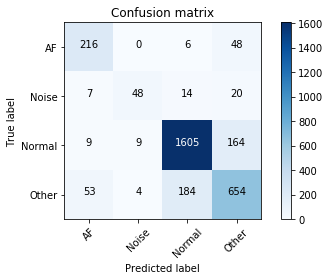

In [2]:
from toolkit import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
test_prediction = model.predict_classes(testData, batch_size=1)
cnf_matrix = confusion_matrix(testL, test_prediction)
plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=False)

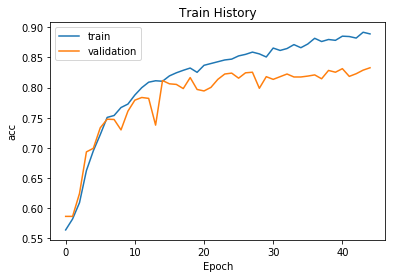

In [3]:
show_plot('acc', train_history_1)

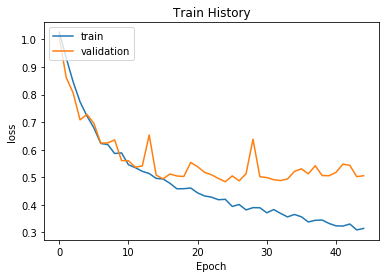

In [4]:
show_plot('loss', train_history_1)